In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/",one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [3]:
mnist.train.images.shape, mnist.train.labels.shape

((55000, 784), (55000, 10))

In [4]:
mnist.test.images.shape, mnist.test.labels.shape

((10000, 784), (10000, 10))

In [0]:
X_train = mnist.train.images
X_test = mnist.test.images
Y_train = mnist.train.labels
Y_test = mnist.test.labels

**Plotting first 64 images** 

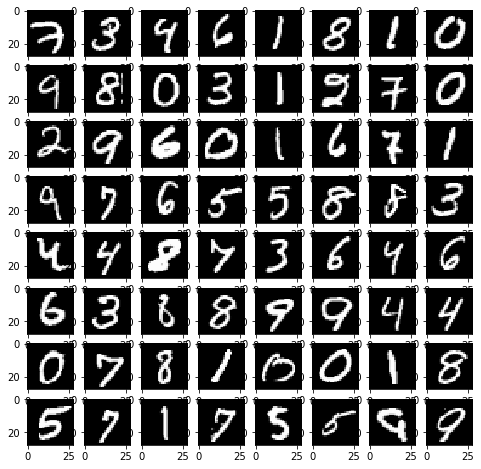

In [6]:
images_train = mnist.train.images.reshape(55000,28,28)
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(images_train[i],cmap = 'gray')
plt.show()

**Neural Network Implementation**

In [0]:
n_inputs = 784
n_hidden1 = 256
n_hidden2 = 256
n_output = 10

weights = {
    'h1':tf.Variable(tf.random_normal([n_inputs,n_hidden1])),
    'h2':tf.Variable(tf.random_normal([n_hidden1,n_hidden2])),
    'out':tf.Variable(tf.random_normal([n_hidden2,n_output])),
}

biases = {
    'h1':tf.Variable(tf.random_normal([n_hidden1])),
    'h2':tf.Variable(tf.random_normal([n_hidden2])),
    'out':tf.Variable(tf.random_normal([n_output])),
}

In [0]:
def forward_propagation(X,weights,biases):
  layer1_input = tf.add(tf.matmul(X,weights['h1']),biases['h1'])
  layer1_output = tf.nn.relu(layer1_input)

  layer2_input = tf.add(tf.matmul(layer1_output,weights['h2']),biases['h2'])
  layer2_output = tf.nn.relu(layer2_input)

  layerout_input = tf.add(tf.matmul(layer2_output,weights['out']),biases['out'])
  layerout_output = layerout_input

  return layerout_output

In [0]:
X = tf.placeholder(tf.float32, shape = (None,n_inputs))
Y = tf.placeholder(tf.int32,shape = (None,n_output))
Y_predicted = forward_propagation(X,weights,biases)
Y_true_classes = tf.arg_max(Y,1)
Y_predicted_classes = tf.arg_max(Y_predicted,1)

In [0]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = Y_predicted,labels = Y))

In [0]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
optimize = optimizer.minimize(cost)

**Executing the NN**

In [0]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [0]:
for i in range(30):
  batch_size = 50
  for j in range(5500):
    sess.run(optimize,feed_dict={X:X_train[batch_size*j:batch_size*(j+1),:],Y:Y_train[batch_size*j:batch_size*(j+1),:]})

In [0]:
y_pred = sess.run(Y_predicted_classes,feed_dict={X:X_test,Y:Y_test})
y_true = sess.run(Y_true_classes,feed_dict={Y:Y_test})

In [17]:
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))

0.9702
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.96      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.96      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.97      0.94      0.96       974
           9       0.95      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



**Visualization of Testing Results**

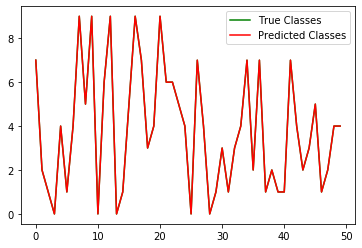

In [21]:
import numpy as np
x = np.arange(50)
plt.plot(x,y_true[0:50],'g',label='True Classes')
plt.plot(x,y_pred[0:50],'r',label='Predicted Classes')
plt.legend()
plt.show()